In [1]:

#**********************************************************************
#Slide-153: Time Series Mining with Matrix Profile (Discords)
#**********************************************************************

from matplotlib import pyplot as plt
import numpy as np
import matrixprofile as mp
import math 

In [2]:
path = 'datasets/airline-passengers.csv'

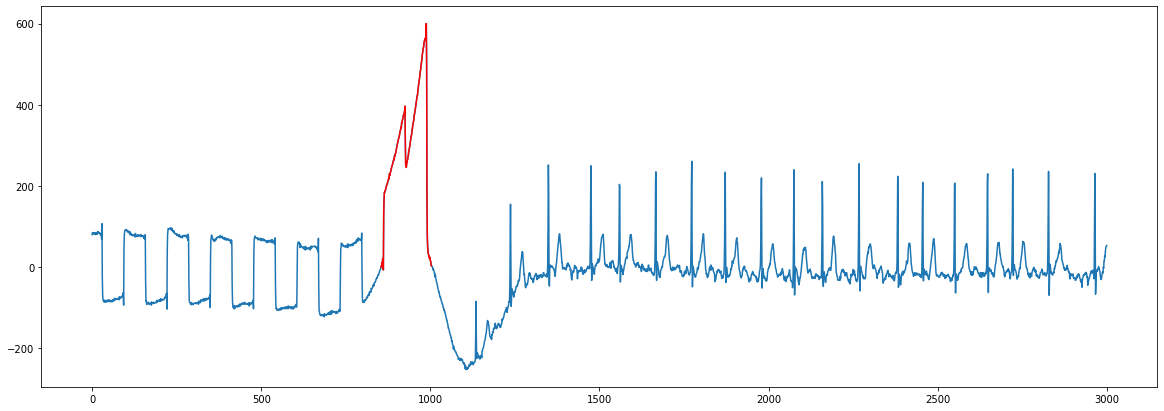

In [3]:

ecg = mp.datasets.load('ecg-heartbeat-av')
ts = ecg['data']
window_size = 150
profile = mp.compute(ts, windows=window_size)
dprofile = mp.discover.discords(profile, k=1, exclusion_zone=window_size*7)
mp_adjusted = np.append(dprofile['mp'], np.zeros(dprofile['w'] - 1) + np.nan)
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20,7))
ax.plot(np.arange(len(dprofile['data']['ts'])), dprofile['data']['ts'])
for discord in profile['discords']:
    x = np.arange(discord, discord + profile['w'])
    y = profile['data']['ts'][discord:discord + profile['w']]
    ax.plot(x, y, c='r')
plt.show()
